In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [9]:
taxis.total.describe()

count    6433.000000
mean       18.517794
std        13.815570
min         1.300000
25%        10.800000
50%        14.160000
75%        20.300000
max       174.820000
Name: total, dtype: float64

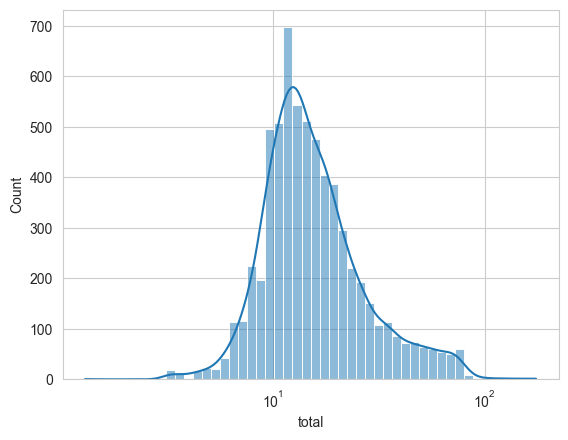

In [45]:
sns.histplot(
  x='total',
  data=taxis,
  bins = 50,
  kde = True,
  log_scale=True
);

In [80]:
sns.set_style('ticks')
# dark darkgrid light whitegrid ticks 

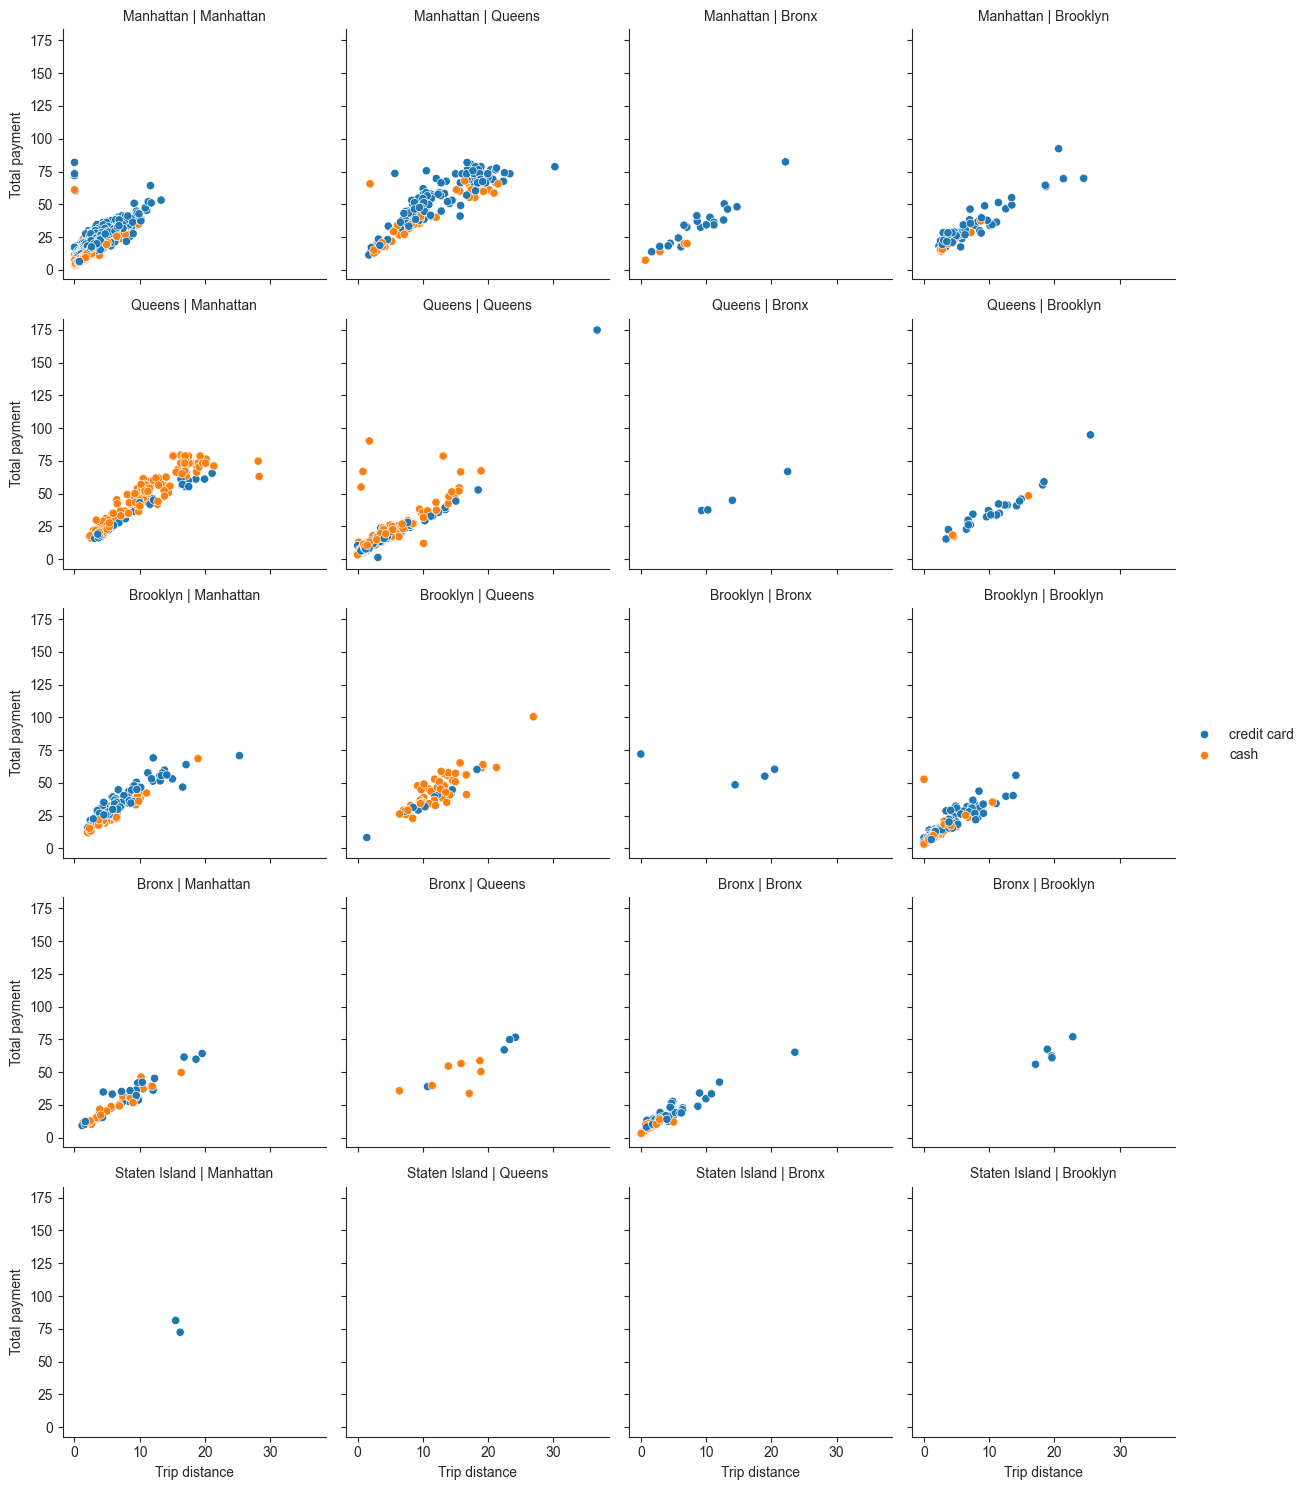

In [81]:
fg = sns.FacetGrid(
  taxis,
  col = "pickup_borough",
  row = 'dropoff_borough',
  # sns.histplot,
  # sharey = False,
  # ylim = (0,175),
  # hue = 'payment'
)
# fg.map(sns.histplot, 'total')
# fg.map_dataframe(sns.histplot, y = 'total')
fg.map_dataframe(sns.scatterplot, x = 'distance', y = 'total', 
               hue = 'payment'
                )
fg.set_axis_labels('Trip distance', 'Total payment')
# fg.set_titles(col_template='Borough {col_name}')
fg.set_titles(col_template='{col_name}',row_template='{row_name}')
fg.add_legend();


In [82]:
sns.set_style('darkgrid')

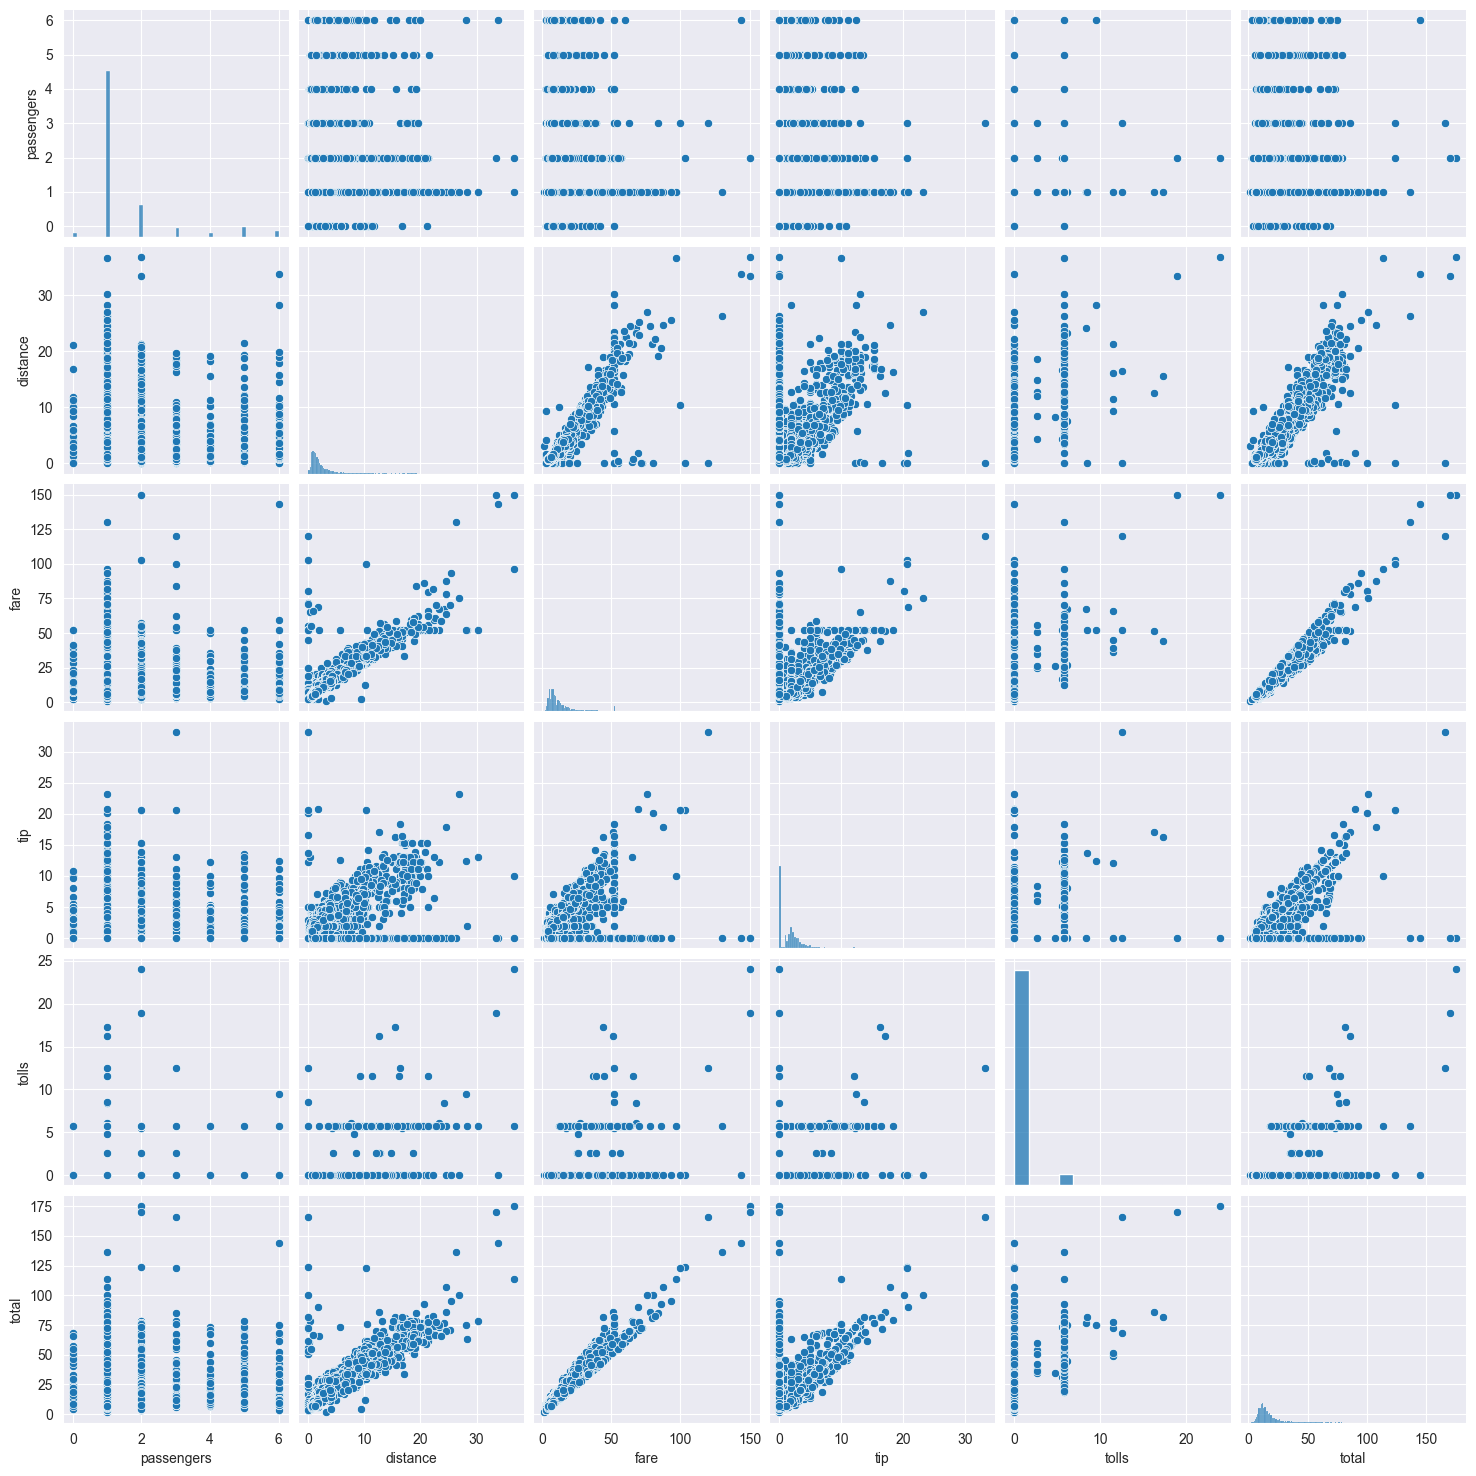

In [83]:
sns.pairplot(taxis)

In [84]:
taxis.passengers = taxis.passengers.astype('category')

In [85]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   category      
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: category(1), datetime64[ns](2), float

In [92]:
taxis.passengers.dtypes

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6], ordered=False, categories_dtype=int64)

In [116]:
taxis['pickup'] = pd.to_datetime(taxis['pickup'], errors="coerce")

passengers
1    4678
2     876
5     277
3     243
6     153
4     110
0      96
Name: count, dtype: int64

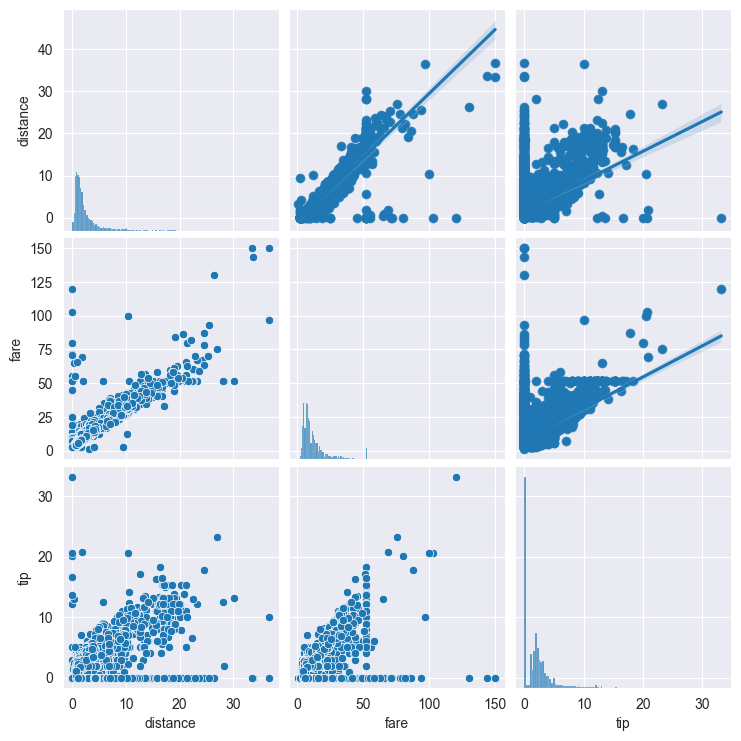

In [118]:
pp = sns.pairplot(taxis[["distance","fare","tip","passengers"]], 
            diag_kind = 'auto', # 'kde', 'reg', 'hist', 'bar', 'hex', 'rug', 'auto', None
      #      kind = 'auto',
      #      hue = 'time',
                 )
pp.map_upper(sns.regplot)
#pp.map_lower(sns.lineplot)


In [113]:
taxis.pickup.dt.dayofweek.value_counts() # 0 = monday

pickup
4    1115
5    1046
2     966
3     905
6     868
1     825
0     708
Name: count, dtype: int64

In [114]:
taxis['weekend'] = taxis.pickup.dt.dayofweek.isin([5, 6])
taxis.weekend.value_counts()

weekend
False    4519
True     1914
Name: count, dtype: int64

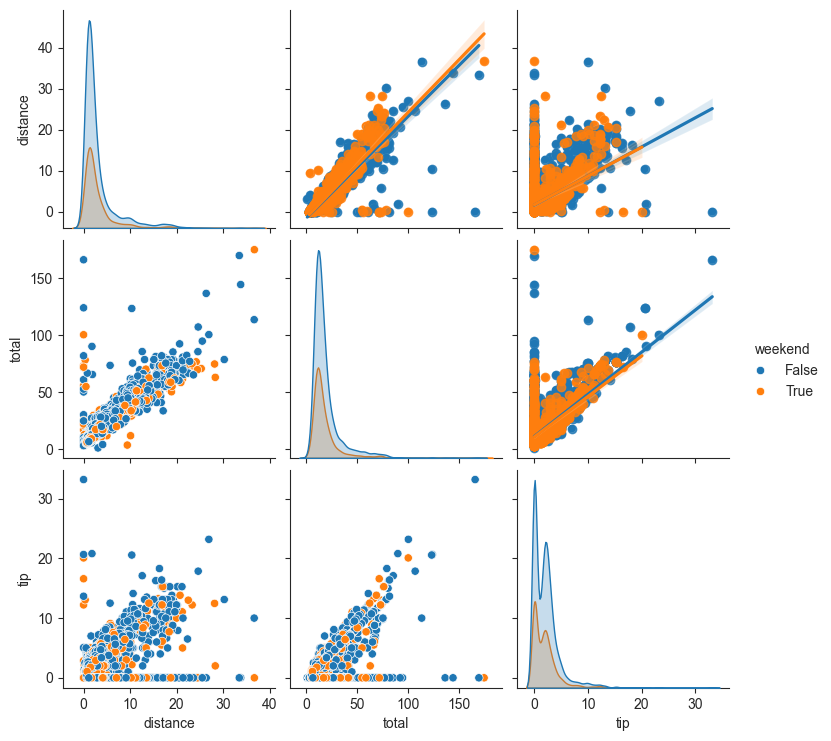

In [177]:
pp = sns.pairplot(taxis, vars = ['distance', 'total', 'tip'],
           #  diag_kind = 'kde',
           # kind = 'reg',
           hue="weekend"
                 )
pp.map_upper(sns.regplot)
#pp.map_lower(sns.lineplot)

In [129]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


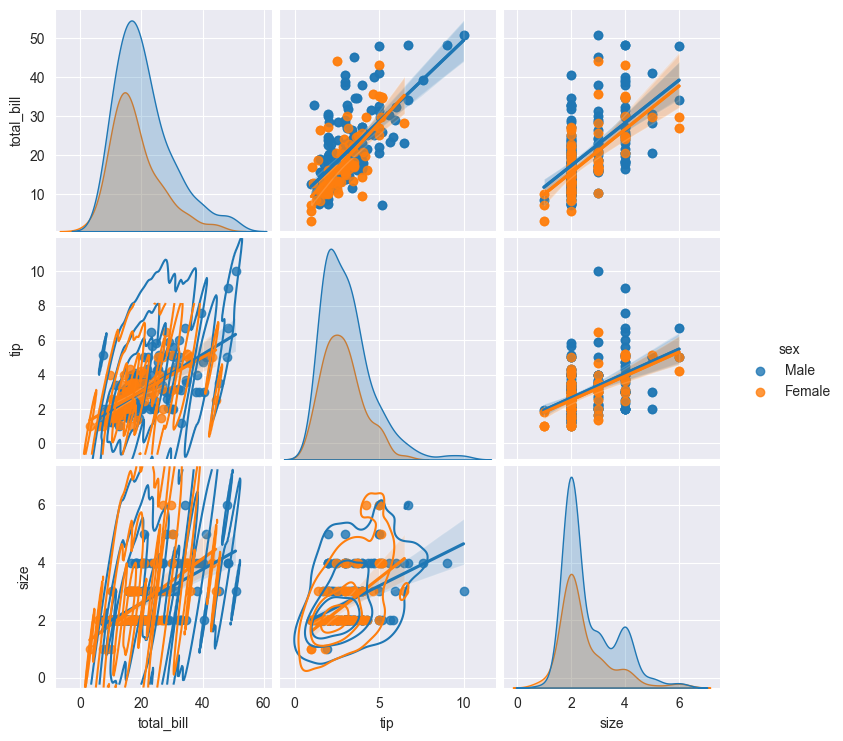

In [128]:
pp = sns.pairplot(tips, 
            diag_kind = 'kde',
           kind = 'reg',
           hue = "sex"
                 )
pp.map_upper(sns.regplot)
pp.map_lower(sns.kdeplot, 
            n_levels = 4, 
            color = 'r'
           )

In [141]:
sns.set_style('ticks')

<Axes: xlabel='pickup', ylabel='distance'>

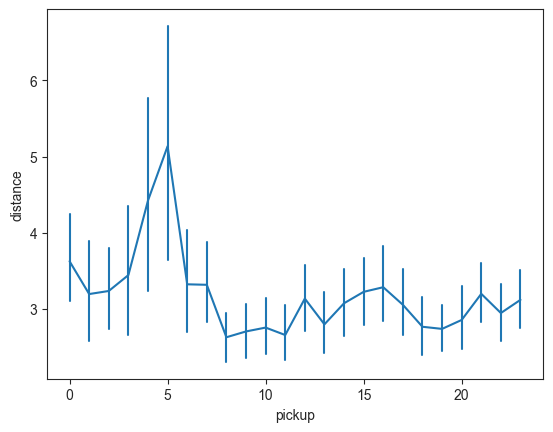

In [143]:
sns.lineplot(
  x = taxis.pickup.dt.hour,
  y = taxis.distance,
  err_style="bars",
  estimator=np.mean
)

<Axes: xlabel='pickup'>

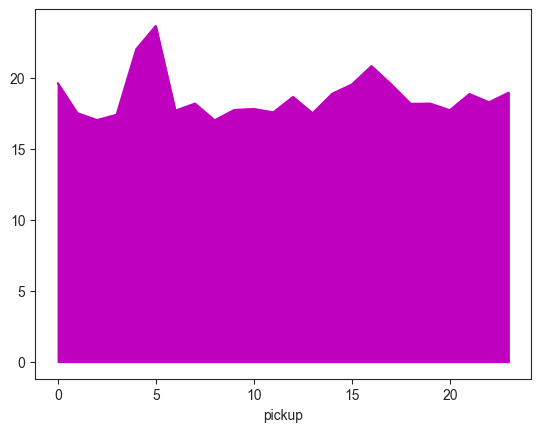

In [175]:
taxis.groupby(taxis.pickup.dt.hour)['total'].mean().plot(kind='area', color='m') # "bar", "hist", "kde", "line", "area", "ascatter", "box", "violin", "barh", "boxen"